# Úkol č. 1 - vizualizace dat a web scraping (do 20. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.volby.cz týkající se voleb do zastupitelstva Vámi vybraného (většího) města, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Vyberte si větší město, které má zastupitelstvo druhu 3 (Zastupitelstvo statutárního města) a strojově stáhněte informace o stranách a kandidátkách z následujících let:
 * [2002](https://www.volby.cz/pls/kv2002/kv12?xjazyk=CZ&xid=0), [2006](https://www.volby.cz/pls/kv2006/kv12?xjazyk=CZ&xid=0), [2010](https://www.volby.cz/pls/kv2010/kv12?xjazyk=CZ&xid=0), [2014](https://www.volby.cz/pls/kv2014/kv12?xjazyk=CZ&xid=0) a [2018](https://www.volby.cz/pls/kv2018/kv12?xjazyk=CZ&xid=0).
 

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data pro vybrané město a uložte je všechny do (asi dvou) přehledných tabulek ve formátu _csv_.
  * Data musí obsahovat _alespoň_ toto:
    * Vývoj výsledků (v procentech i počtu hlasů) pro jednotlivé strany v jednotlivých letech.
    * Seznam všech kandidátů všech stran v jednotlivých letech, u kandidáta by mělo být zaznamenáno: jméno, věk v době voleb, navrhující strana, politická příslušnost, volební zisk (procento i počet hlasů), pořadí na kandidátce, pořadí zvolení, jestli získal mandát (tyto informace získáte souhrnně ve _jmenných seznamech_).
  * V druhé části Vašeho Jupyter notebooku pracujte s těmito tabulkami načtenými z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulky ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
    * Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
    * Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
    * Časový vývoj podílu kandidujících s titulem a bez titulu.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
  * (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
  * (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

# Řešení

Nápady na použití typů grafů jsem čerpal především z https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/, http://benalexkeen.com/bar-charts-in-matplotlib/ a https://python-graph-gallery.com/.

Pro pracování s načtenými daty používám [kopie](https://stackoverflow.com/a/27680109/3281252).

In [1]:
# load packages
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 
matplotlib.style.use('ggplot')

# for debug
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# global "const" variables
YEARS = ['2002', '2006', '2010', '2014', '2018']

## Stažení dat a jejich uložení do CSV

Jako město jsem si vybral `Liberec`. Město splňuje podmínku na zastupitelstvo druhu 3.

> **Poznámka:** v této sekci nespouštějte kód, jednotlivé CSV soubory jsou již vygenerovány a dodány s řešením

In [ ]:
### Fetch, process and save parties data (liberec-parties.csv)

# new parties dataset
parties_data = pd.DataFrame()

for year in YEARS:
    url = f'https://www.volby.cz/pls/kv{year}/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=5103&xobec=563889'
    # download the data
    party_data = pd.read_html(url,flavor='html5lib')[1]
    # rename columns
    party_data.columns = ['kandid listina', 'strana nazev', 'hlasy abs', 'hlasy procenta', 'pocet kandidatu', 'prepocet pocet kandidatu', 'prepocet procenta hlasu', 'pocet mandatu', 'podily hlasu']
    # add year
    party_data['rok'] = year
    # unify data to 1/0 value
    party_data['podily hlasu'] = party_data['podily hlasu'].apply(lambda x: 0 if (x is np.nan or x == '-') else 1)
    # appends this year data to the parties dataset
    parties_data = parties_data.append(party_data, ignore_index=True)

display(parties_data)
parties_data.to_csv('liberec-parties.csv')

In [ ]:
### Fetch, process and save parties data (liberec-candidates.csv)

# new candidates dataset
all_candidates_data = pd.DataFrame()

for year in YEARS:
    url = f'https://www.volby.cz/pls/kv{year}/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5103&xobec=563889&xstrana=0'
    # download the data
    candidates_data = pd.read_html(url,flavor='html5lib')[0]
    
    # already has 'tituly' column
    if (year == '2002'):
        candidates_data.columns = ['strana cislo', 'strana nazev', 'poradi ve strane', 'prijmeni jmeno', 'tituly', 'vek', 'navrhujici strana', 'politicka prislusnost', 'hlasy abs', 'hlasy procenta', 'poradi zvoleni', 'mandat']
        # add year
        candidates_data['rok'] = year
        # unify data to 1/0 value
        candidates_data['mandat'] = candidates_data['mandat'].apply(lambda x: 1 if x == '*' else 0)
        all_candidates_data = all_candidates_data.append(candidates_data, ignore_index=True)
        continue
    
    # rename columns
    candidates_data.columns = ['strana cislo', 'strana nazev', 'poradi ve strane', 'prijmeni jmeno', 'vek', 'navrhujici strana', 'politicka prislusnost', 'hlasy abs', 'hlasy procenta', 'poradi zvoleni', 'mandat']
    # add year
    candidates_data['rok'] = year
    
    tmp = candidates_data['prijmeni jmeno'].astype(str).str.split("\s(?=(?:\S+\.))", n = 2, expand = True)
    candidates_data['prijmeni jmeno'] = tmp[0]
    tmp[1].fillna('', inplace=True)
    tmp[2].fillna('', inplace=True)
    candidates_data['tituly'] = tmp[1] + ' ' + tmp[2]
    candidates_data['tituly'] = candidates_data['tituly'].apply(lambda x: np.nan if x == ' ' else x)

    # unify data
    candidates_data['poradi zvoleni'] = candidates_data['poradi zvoleni'].apply(lambda x: np.nan if x == '-' else x)
    candidates_data['mandat'] = candidates_data['mandat'].apply(lambda x: 0 if x == '-' else 1)
    
    # appends this year data to the parties dataset
    all_candidates_data = all_candidates_data.append(candidates_data, ignore_index=True)

# make number from 'hlasy abs'
all_candidates_data['hlasy abs'] = all_candidates_data['hlasy abs'].replace('\s', '', regex=True)
all_candidates_data['hlasy abs'] = pd.to_numeric(all_candidates_data['hlasy abs'], errors='ignore')

display(all_candidates_data)
all_candidates_data.to_csv('liberec-candidates.csv')


## Načtení dat

In [2]:
data_parties = pd.read_csv('liberec-parties.csv')
data_candidates = pd.read_csv('liberec-candidates.csv')

#display(data_parties)
#display(data_candidates)

## Časový vývoj

Task: Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).

Data jsem náležitě upravil, především pomocí vhodného použití `groupby` a `sort_values` a nechal je zobrazit.

<Figure size 1440x1440 with 0 Axes>

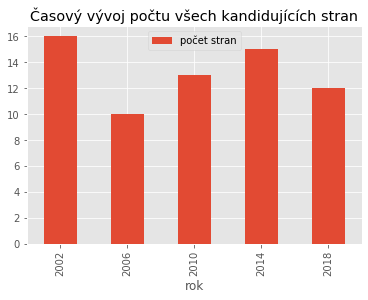

<Figure size 1440x1440 with 0 Axes>

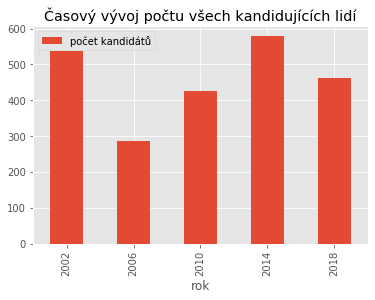

In [3]:
# casovy vyvoj stran celkove
data = data_parties.copy()

#data['idx'] = data.groupby('rok').cumcount()+1
#data = data.pivot_table(index=['rok'], columns='idx',  aggfunc='first')
#data = data['strana nazev'].iloc[:].notnull().sum(axis=1, skipna = True)
data = data[['rok', 'strana nazev']].groupby('rok').count()
plt.figure(figsize=(20, 20))
data.plot.bar()
plt.title('Časový vývoj počtu všech kandidujících stran')
plt.legend(['počet stran'])
plt.show()

# casovy vyvoj kandidatu celkove
data = data_candidates.copy()

data = data[['rok', 'strana nazev']].sort_values(by=['strana nazev']).groupby('rok').count()
plt.figure(figsize=(20, 20))
data.plot.bar()
plt.title('Časový vývoj počtu všech kandidujících lidí')
plt.legend(['počet kandidátů'])
plt.show()

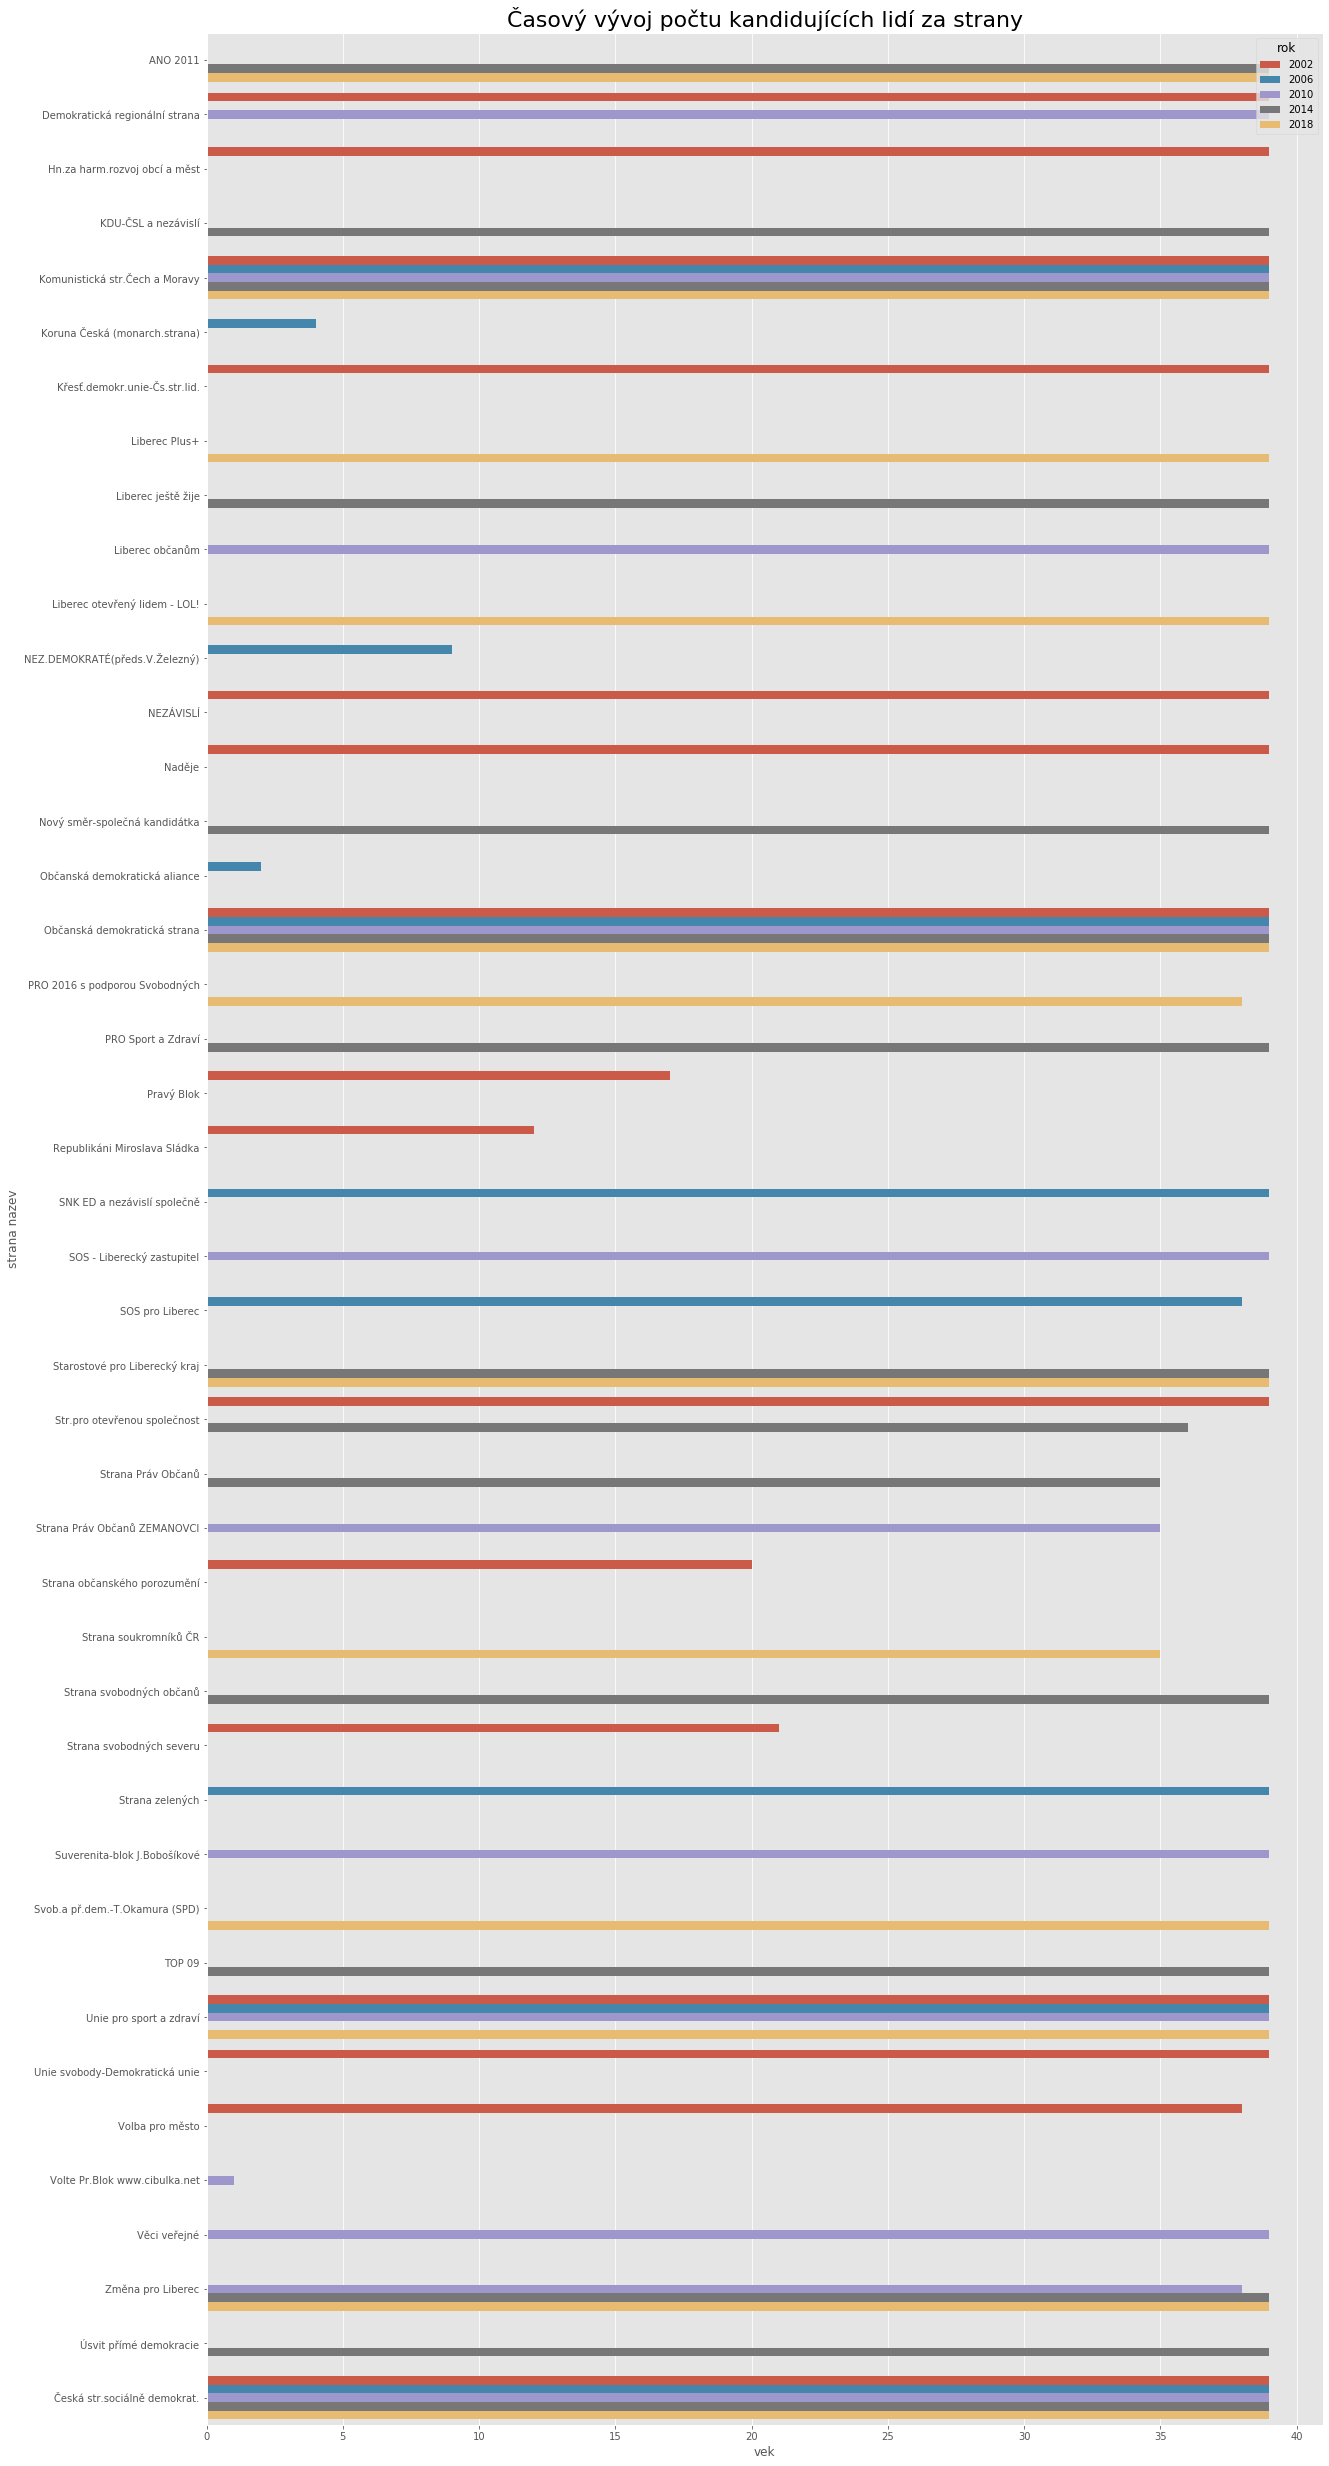

In [4]:
# za srany
data = data_candidates.copy()

# prepare data, fix indexing
data = data_candidates.sort_values(by=['strana nazev', 'rok']).groupby(['strana nazev', 'rok'], as_index=False).count()

plt.figure(figsize=(20, len(data['strana nazev'].unique())))
#data.plot('rok')
sns.barplot(x='vek', y='strana nazev', hue='rok', data=data)
plt.title('Časový vývoj počtu kandidujících lidí za strany', fontsize=22)
plt.show()

## Věková struktura kandidátů


Task: Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.

Provedl jsem zobrazení do [violin plotu](https://seaborn.pydata.org/generated/seaborn.violinplot.html), který zobrazí závislost věku na roku a příhodně jej zobrazí tak, že z něho jde poznat mohutnost dané skupiny.

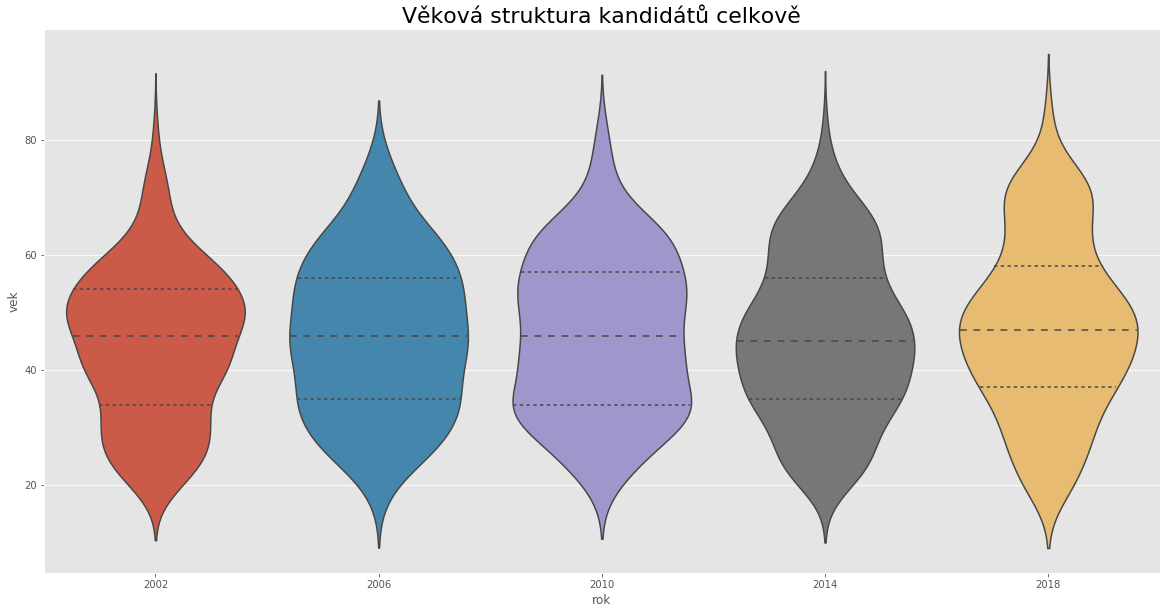

In [5]:
# celkove
data = data_candidates.copy()

plt.figure(figsize=(20, 10))
sns.violinplot(x='rok', y="vek", data=data, scale='width', inner='quartile')
plt.title('Věková struktura kandidátů celkově', fontsize=22)
plt.show()

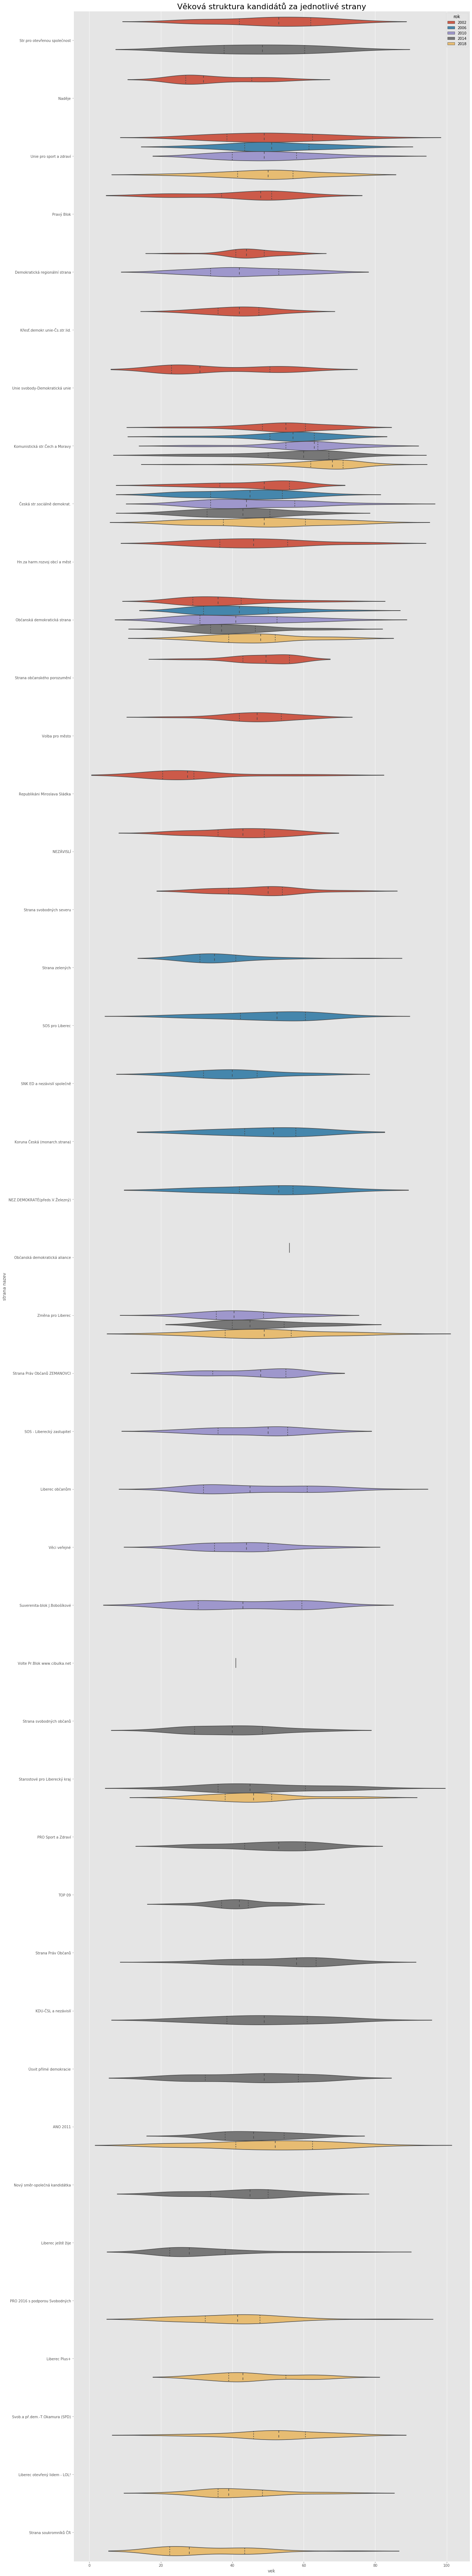

In [6]:
# jednolive strany
data = data_candidates.copy()

# dynamically update size
number_of_parties = len(data['strana nazev'].unique())
plt.figure(figsize=(20, number_of_parties * 3))
sns.violinplot(x='vek', y='strana nazev', hue="rok", data=data, scale='width', inner='quartile')
plt.title('Věková struktura kandidátů za jednotlivé strany', fontsize=22)
plt.show()

## Časový vývoj volební účasti a volebních výsledků jednotlivých stran

Task: Časový vývoj volební účasti a volebních výsledků jednotlivých stran.

Za volební výsledek beru v tomto případě počet získaných mandátů, protože to je údaj, který prakticky ovlivňuje "sílu" strany v daném období.

Pro volební účast zobrazuji hodnotu 1/0 podle účasti ve volbách.

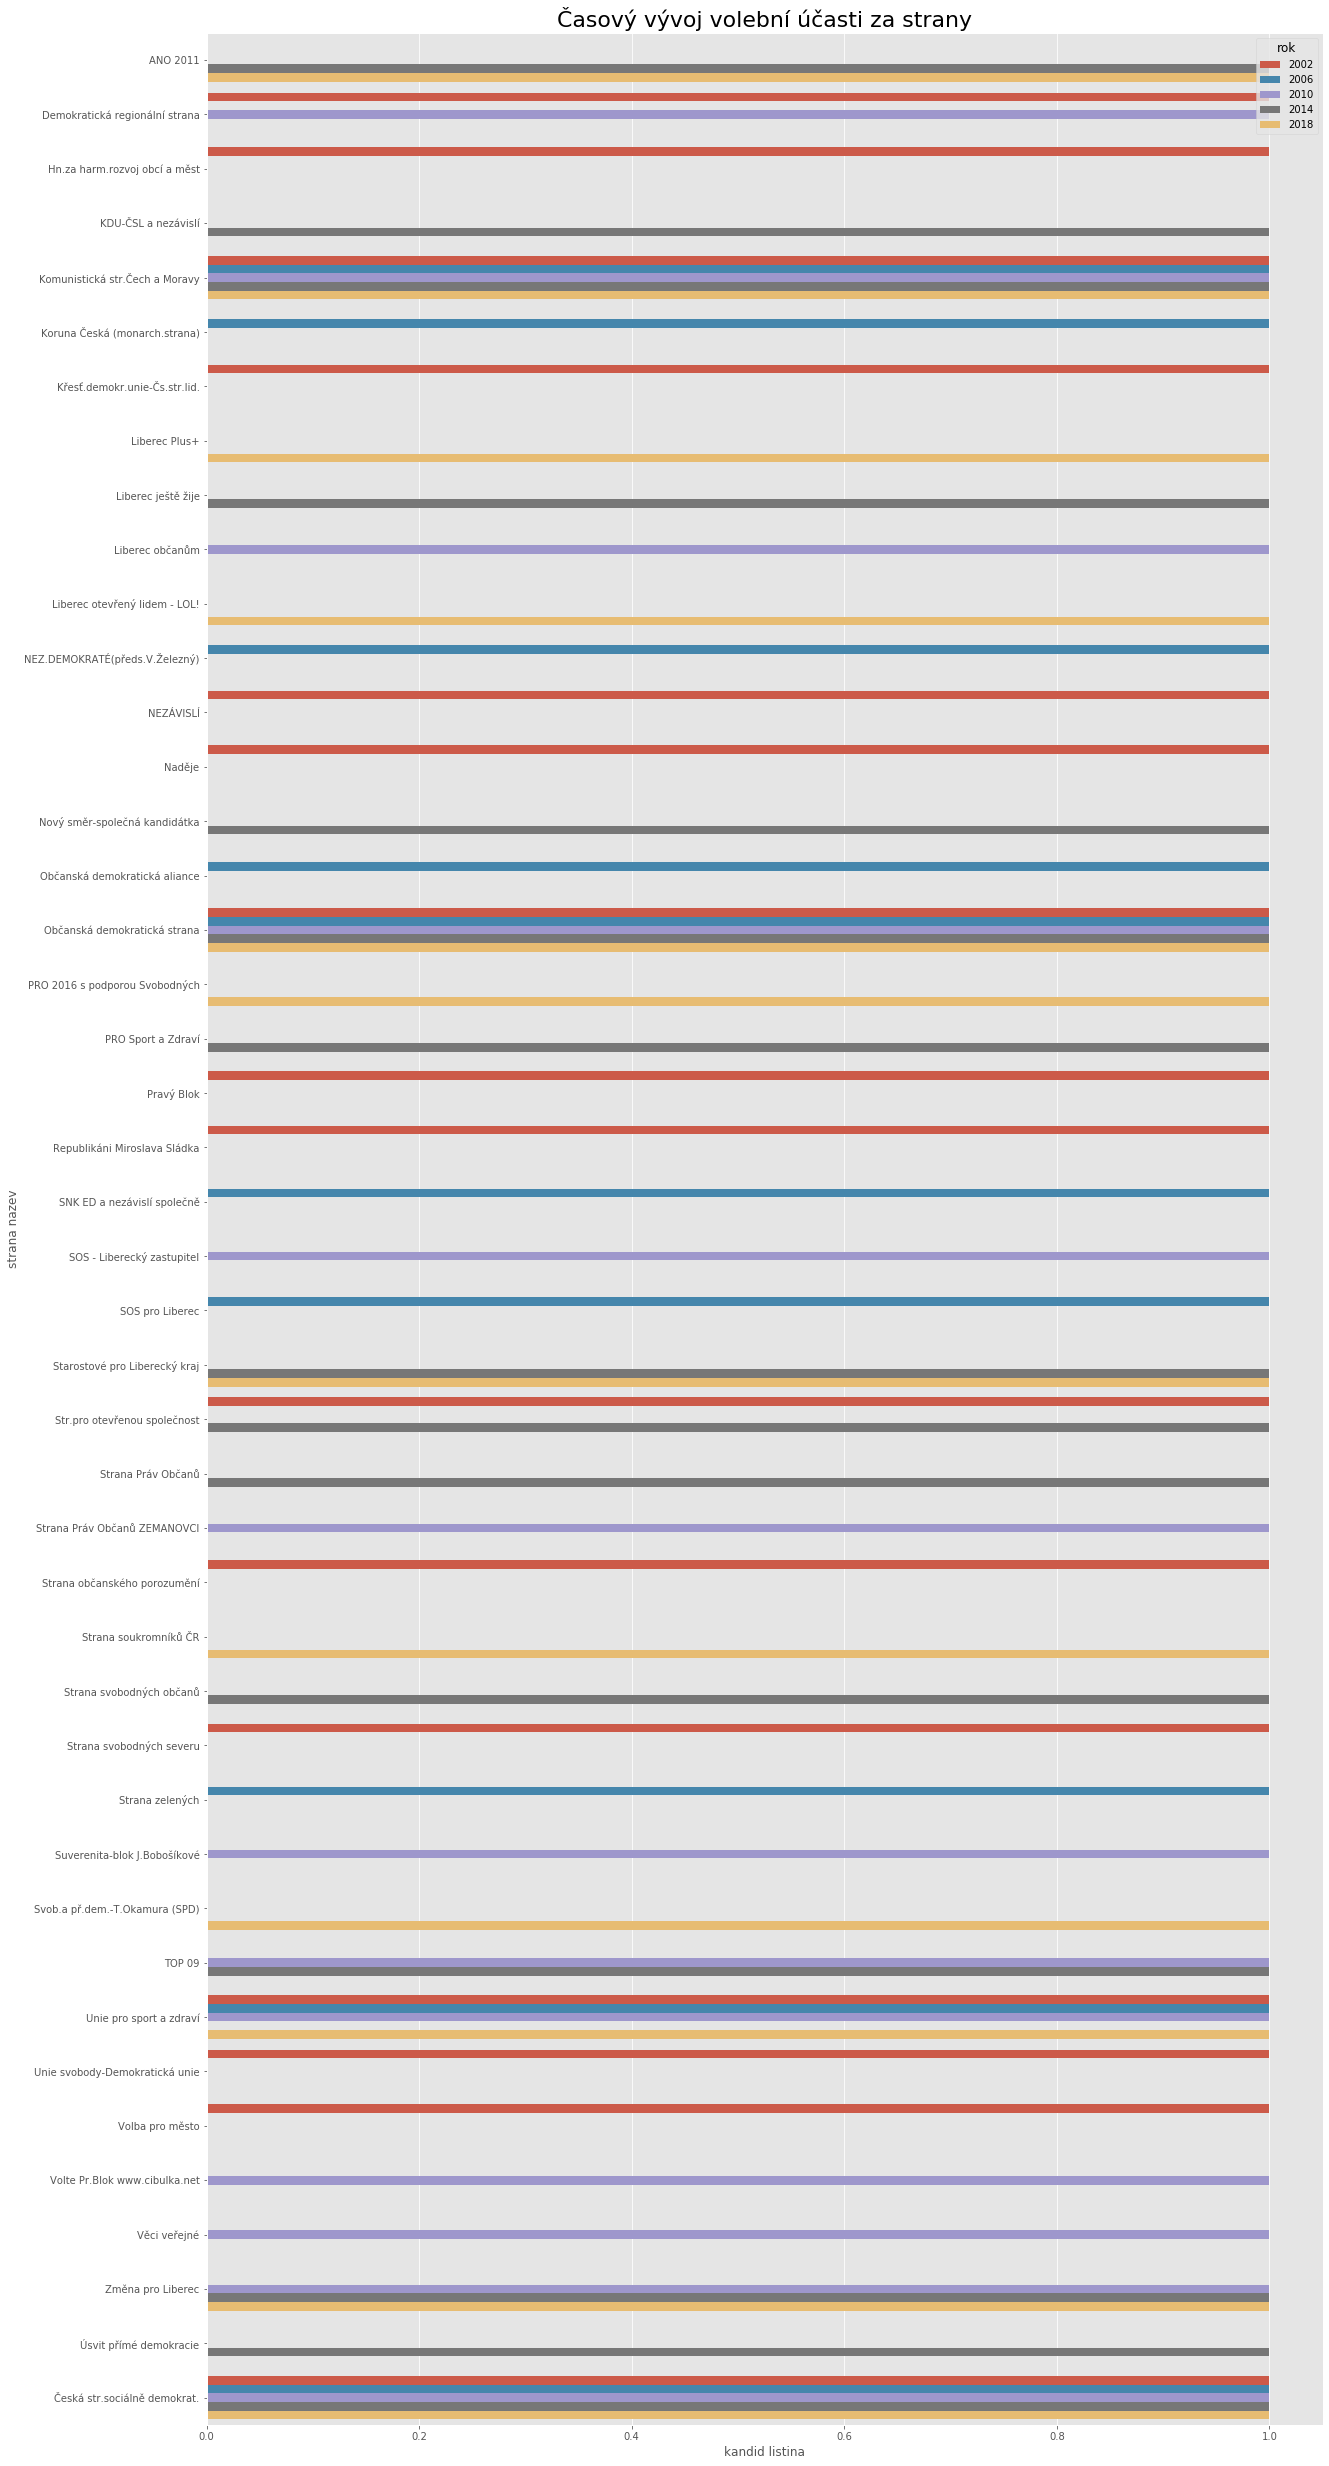

In [7]:
# volební účast
data = data_parties.copy()

data = data.sort_values(by=['strana nazev']).groupby(['strana nazev', 'rok'], as_index=False).count()
#display(data)

plt.figure(figsize=(20, len(data['strana nazev'].unique())))
sns.barplot(y='strana nazev', x='kandid listina', data=data, hue='rok')
plt.title('Časový vývoj volební účasti za strany', fontsize=22)
plt.show()

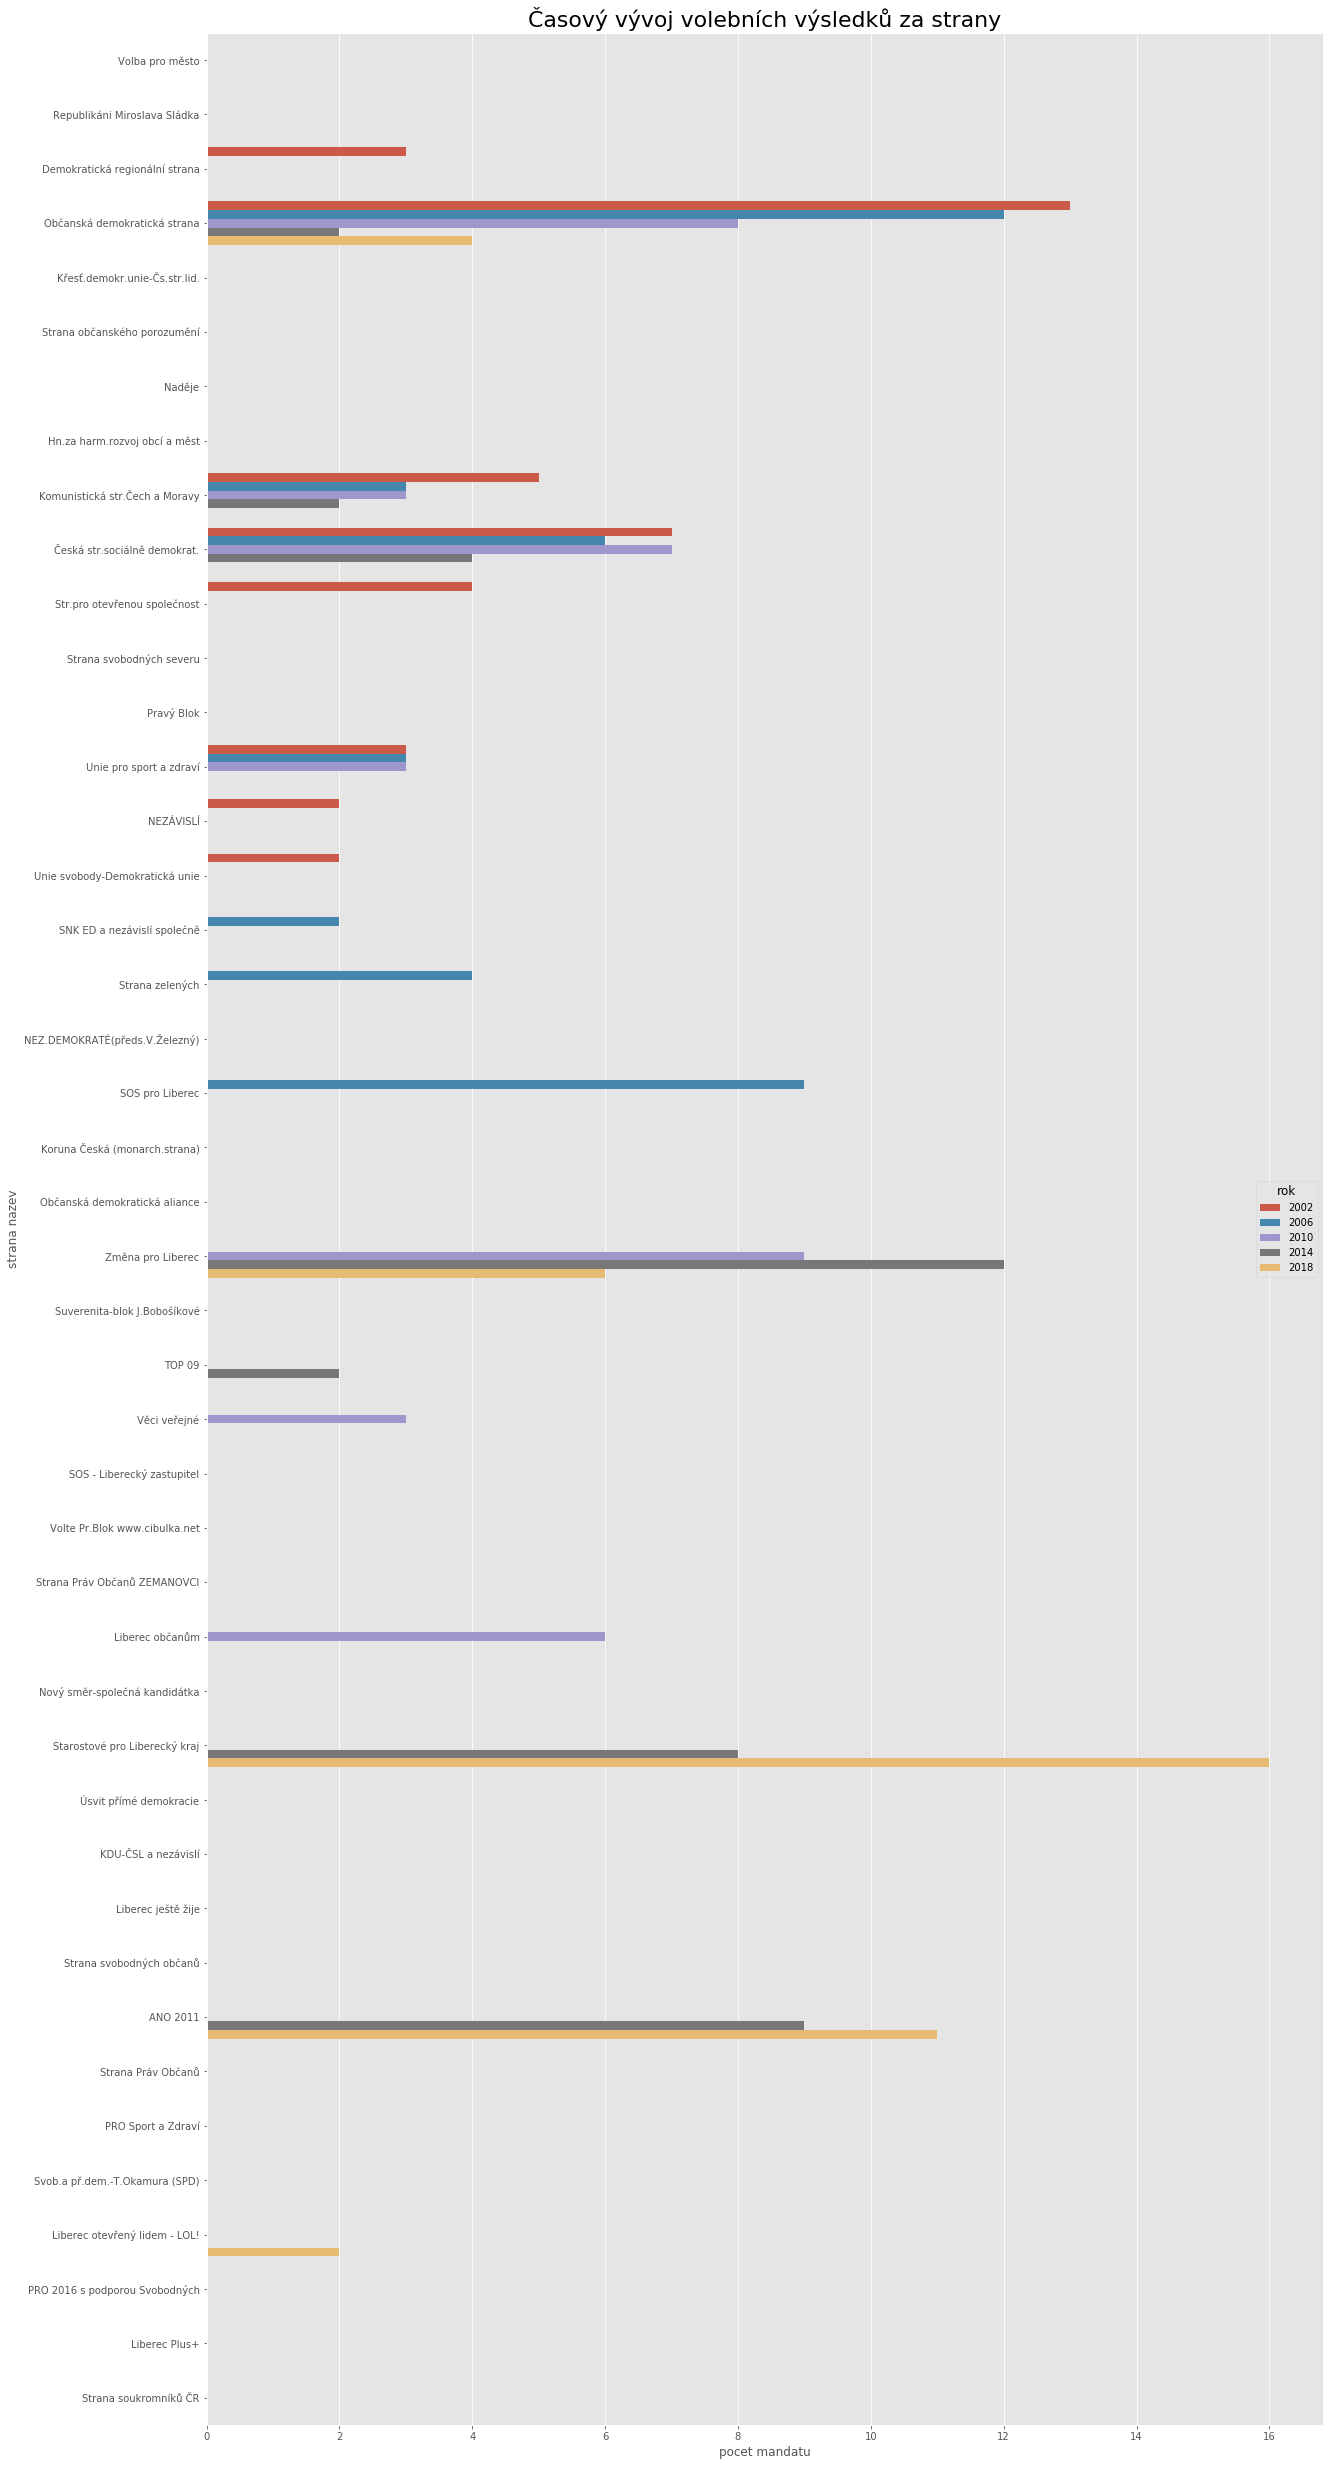

In [8]:
# volební výsledky
data = data_parties.copy()
#display(data)

plt.figure(figsize=(20, len(data['strana nazev'].unique())))
sns.barplot(y='strana nazev', x='pocet mandatu', data=data, hue='rok')
plt.title('Časový vývoj volebních výsledků za strany', fontsize=22)
plt.show()

## Časový vývoj podílu kandidujících s titulem a bez titulu

Task: Časový vývoj podílu kandidujících s titulem a bez titulu.

Zobrazí, zda-li mají kandidáti titul(y) nebo ne v rámci jednotlivých let.

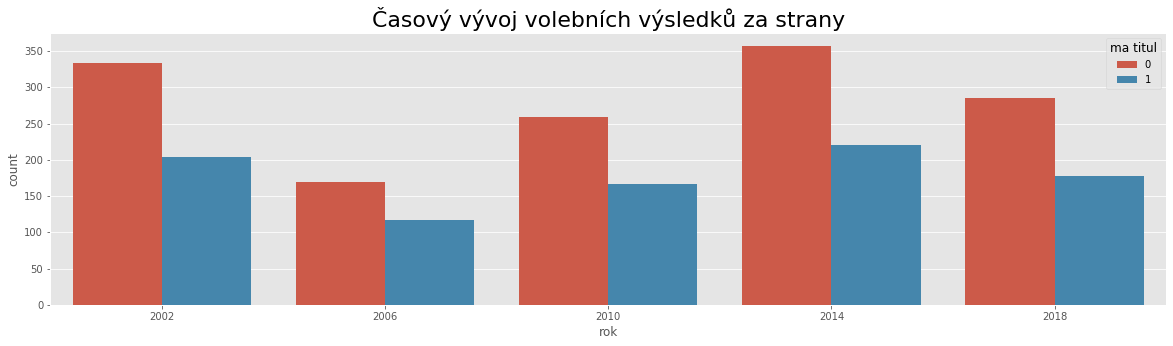

In [9]:
data = data_candidates.copy()

# prepare data determining if the candidate has or has not he title(s)
data['ma titul'] = data['tituly'].iloc[:].notnull().apply(lambda x: 1 if x == True else 0)
#data['nema titul'] = data['tituly'].iloc[:].isnull().apply(lambda x: 1 if x == True else 0)
# compute how many candidates has and has not some title(s) in each year
#data = data.sort_values(by=['rok', 'ma titul']).groupby(['rok'], as_index=False).sum()
#display(data)

plt.figure(figsize=(20, len(data['rok'].unique())))
sns.countplot(data=data, x='rok', hue='ma titul')
plt.title('Časový vývoj volebních výsledků za strany', fontsize=22)
plt.show()

## Bonus (+2): U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.

## Bonus (+4): Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.

Píli kandidáta beru četnost ve volbách (tj. kdo se účastnil nejvícekrát). Volebním ziskem beru absolutní hlasy.

In [10]:
data = data_candidates.copy()

#display(data[data['prijmeni jmeno'] == 'Šolc Jiří'])

data = data.sort_values(by=['prijmeni jmeno', 'rok']).groupby('prijmeni jmeno', as_index=False).agg({'hlasy abs': lambda x: np.sum(x), 'rok': 'count', 'mandat': 'sum', 'strana nazev' : lambda x: ', '.join(x.unique())}).sort_values(by=['rok', 'hlasy abs'], ascending=False)
display(data[:10])

,prijmeni jmeno,hlasy abs,rok,mandat,strana nazev
1729,Šolc Jiří,29945,4,4,"SOS pro Liberec, Liberec občanům, Starostové p..."
729,Kočárková Eva,27019,4,1,"SOS pro Liberec, Liberec občanům, Starostové p..."
690,Korytář Jan,27018,4,4,"Strana zelených, Změna pro Liberec"
1258,Rosenbergová Věra,26929,4,2,"SOS pro Liberec, Liberec občanům, Starostové p..."
459,Hron Michal,26781,4,2,"SOS pro Liberec, Liberec občanům, Starostové p..."
744,Kracík Vladimír,25650,4,0,"SOS pro Liberec, Liberec občanům, Starostové p..."
1179,Prade Robert,24848,4,1,"SOS pro Liberec, Liberec občanům, Starostové p..."
1697,Šedlbauer Josef,24602,4,3,"Strana zelených, Změna pro Liberec"
3,Absolonová Kateřina,24364,4,3,"Strana zelených, Změna pro Liberec"
1389,Tachovská Zuzana,21840,4,1,"Strana zelených, Změna pro Liberec"


## Bonus (+2): Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.